<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/Course_8_Module_3_Exercise_Waffle_Charts_Word_Clouds_and_Regression_Plots_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/logo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Waffle Charts, Word Clouds, and Regression Plots

Estimated time needed: **40** minutes

## Objectives

After completing this lab you will be able to:

*   Create Word cloud and Waffle charts
*   Create regression plots with Seaborn library


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Import Libraries](#0)<br>
2.  [Fetching Data](#1)<br>
3.  [Waffle Charts](#3) <br>
4.  [Word Clouds](#4) <br>
5.  [Ploting with Seaborn](#5) <br>
6.  [Regression Plots](#6) <br>

</div>


# Import Libraries<a id="0"></a>


In [1]:
#Import and setup matplotlib:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

#install seaborn and wordcloud
!pip install seaborn wordcloud

#import seaborn
import seaborn as sns

#import wordcloud
import wordcloud

# check for latest version of Matplotlib and seaborn
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Seaborn version: ', sns.__version__)
print('WordCloud version: ', wordcloud.__version__)

Matplotlib version:  3.8.0
Seaborn version:  0.13.2
WordCloud version:  1.9.4


# Fetching Data<a id="1"></a>

Toolkits: The course heavily relies on [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and [*Numpy*](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) for data wrangling, analysis, and visualization. The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. <br><br>In this lab, we will focus on the Canadian Immigration data and use the *already cleaned dataset*.<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/v4/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)



Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's take a look at the first five items in our dataset


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's find out how many entries there are in our dataset


In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


In [5]:
#set Country as index
df_can.set_index('Country', inplace=True)

In [6]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Waffle Charts <a id="3"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.


Let's revisit the previous case study about Denmark, Norway, and Sweden.


In [7]:
# let's create a new dataframe for these three countries
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Unfortunately, unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.


In [14]:
# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum(axis=0)
category_proportions = df_dsn['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


**Step 2.** The second step is defining the overall size of the `waffle` chart.


In [15]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles


In [16]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.


**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.


In [17]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print ('Waffle chart populated!')

Waffle chart populated!


Let's take a peek at how the matrix looks like.


In [18]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.


**Step 5.** Map the `waffle` chart matrix into a visual.


<Figure size 640x480 with 0 Axes>

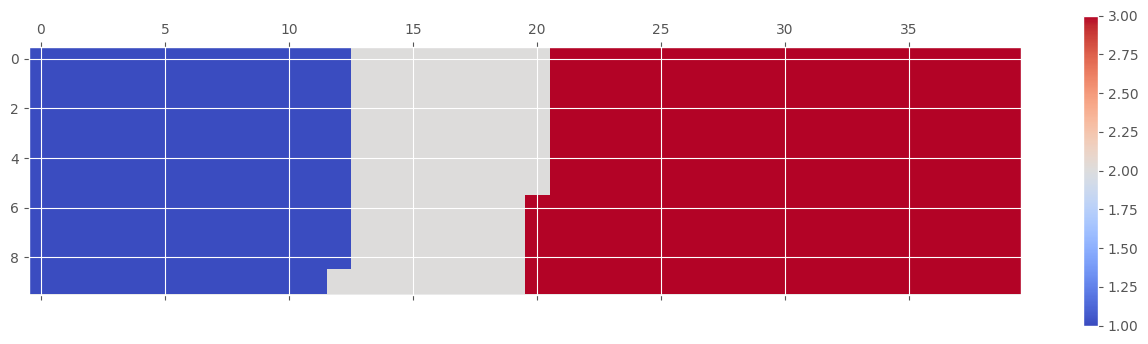

In [19]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.


<Figure size 640x480 with 0 Axes>

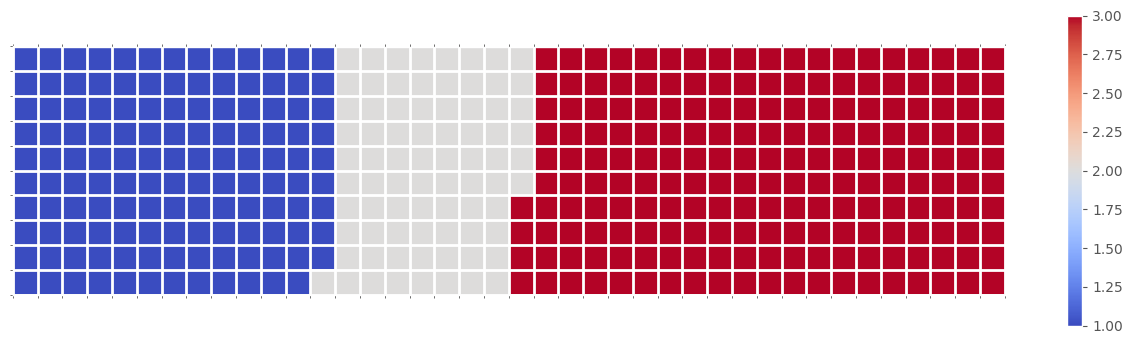

In [20]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

**Step 7.** Create a legend and add it to chart.


<ipython-input-21-6db0426703ff>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
<ipython-input-21-6db0426703ff>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
<ipython-input-21-6db0426703ff>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_val = colormap(float(values_cumsum[i])/total_values)


<Figure size 640x480 with 0 Axes>

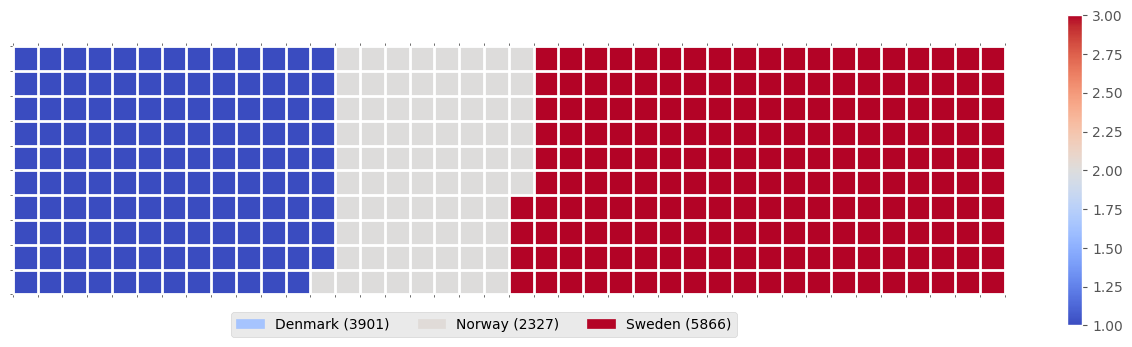

In [21]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

And there you go! What a good looking *delicious* `waffle` chart, don't you think?


Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [22]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Now to create a `waffle` chart, all we have to do is call the function `create_waffle_chart`. Let's define the input parameters:


In [23]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

And now let's call our function to create a `waffle` chart.


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<ipython-input-22-adf5f5431502>:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
<ipython-input-22-adf5f5431502>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
<ipython-input-22-adf5f5431502>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_val = colormap(float(values_cumsum[i])/total_values)


<Figure size 640x480 with 0 Axes>

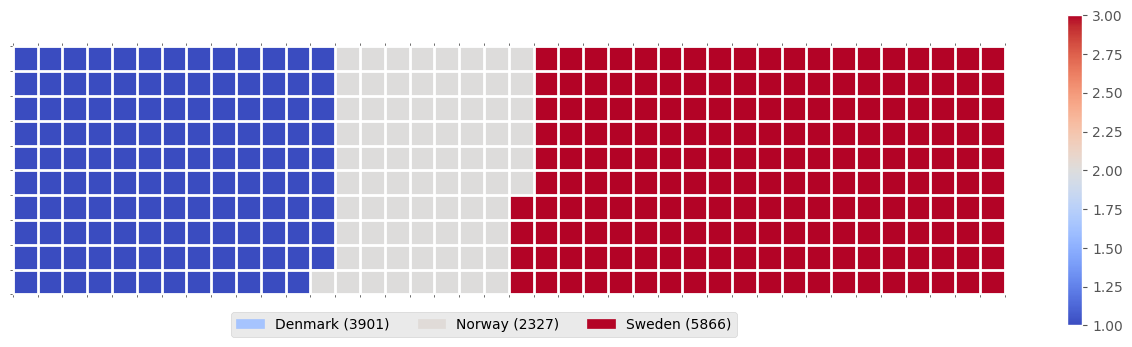

In [24]:
create_waffle_chart(categories, values, height, width, colormap)

There seems to be a new Python package for generating `waffle charts` called [PyWaffle](https://github.com/ligyxy/PyWaffle), <br><br>Let's create the same waffle chart with **pywaffle** now


In [25]:
#install pywaffle
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 61.7 MB/s eta 0:00:00


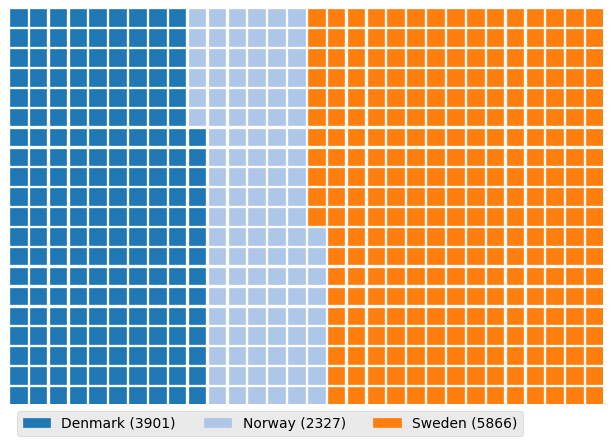

In [26]:
#import Waffle from pywaffle
from pywaffle import Waffle

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

**Question:** Create a Waffle chart to dispaly the proportiona of China and Inida total immigrant contribution.


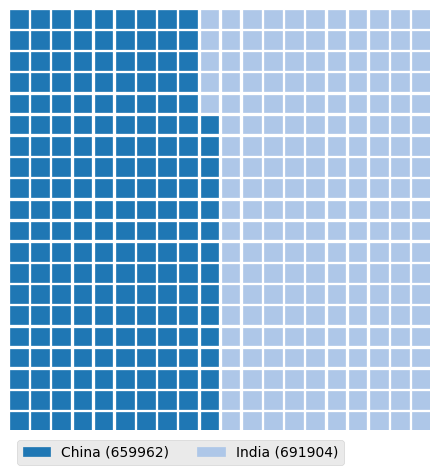

In [36]:
# Step1: let's create a new dataframe for these two countries
df_ci = df_can.loc[['China', 'India'], :]

# let's take a look at our dataframe (optional or run in another line of code)
#df_ci


#import Waffle from pywaffle
from pywaffle import Waffle

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 20, #pass the number of rows and columns for the waffle
                 values = df_ci['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_ci.index.values,df_ci.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    #hint
    #create dataframe
    data_CI = .............
    #Set up the Waffle chart figure

    fig = plt.figure(FigureClass = ............,
                     rows = ........, columns =....., #pass the number of rows and columns for the waffle
                     values = ........., #pass the data to be used for display
                     cmap_name = 'tab20', #color scheme
                     legend = {'labels':[.......],
                                'loc': ........., 'bbox_to_anchor':(....),'ncol': 2}
                     #notice the use of list comprehension for creating labels
                     #from index and total of the dataset
                    )

    #Display the waffle chart
    plt.show()
```


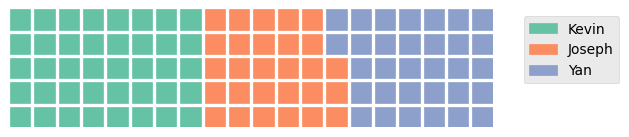

In [38]:
# Useful libraries, including pyWaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Create simple dummy data
data = {'Kevin': 10, 'Joseph': 7, 'Yan': 8}

# Basic waffle chart
plt.figure(
    FigureClass=Waffle,  # Use Waffle as the figure class
    rows=5,              # Number of rows in the waffle chart
    columns=20,          # Number of columns in the waffle chart
    values=data,         # Data to visualize
    legend={             # Customize legend
        'loc': 'upper left',          # Legend position
        'bbox_to_anchor': (1.05, 1),  # Shift legend outside the chart
    },
)
plt.show()
# Note: Pywaffle automatically assigns the legends

# Word Clouds <a id="4"></a>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.


First, let's install the package.


In [42]:
#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud imported!')

Wordcloud imported!


`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by **Lewis Carroll** titled *Alice's Adventures in Wonderland*. Let's go ahead and download a *.txt* file of the novel.


In [43]:
import urllib

# # open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [44]:
alice_novel[:300]

"\ufeffProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online"

Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.


In [45]:
stopwords = set(STOPWORDS)

# What are Stopwords?

Stopwords are common words in a language that are typically filtered out in text processing tasks because they do not carry significant meaning. These words are very frequent (e.g., "the", "and", "is", "in") and are often removed to focus on the more meaningful words in the text.

In the context of the WordCloud library, the STOPWORDS set contains a predefined list of such common words. When generating a word cloud, the library excludes words in the STOPWORDS set to improve the relevance of the visualization.

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.


In [ ]:
#if you get attribute error while generating worldcloud, upgrade Pillow and numpy using below code
#%pip install --upgrade Pillow
#%pip install --upgrade numpy

In [46]:
# instantiate a word cloud object
alice_wc = WordCloud()

# generate the word cloud
alice_wc.generate(alice_novel)

Awesome! Now that the `word` cloud is created, let's visualize it.


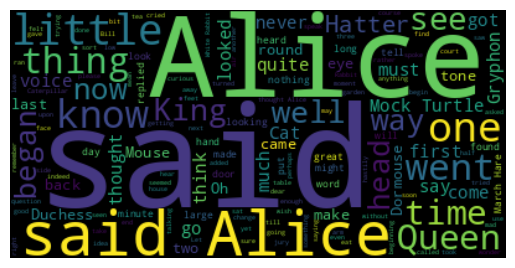

In [47]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.


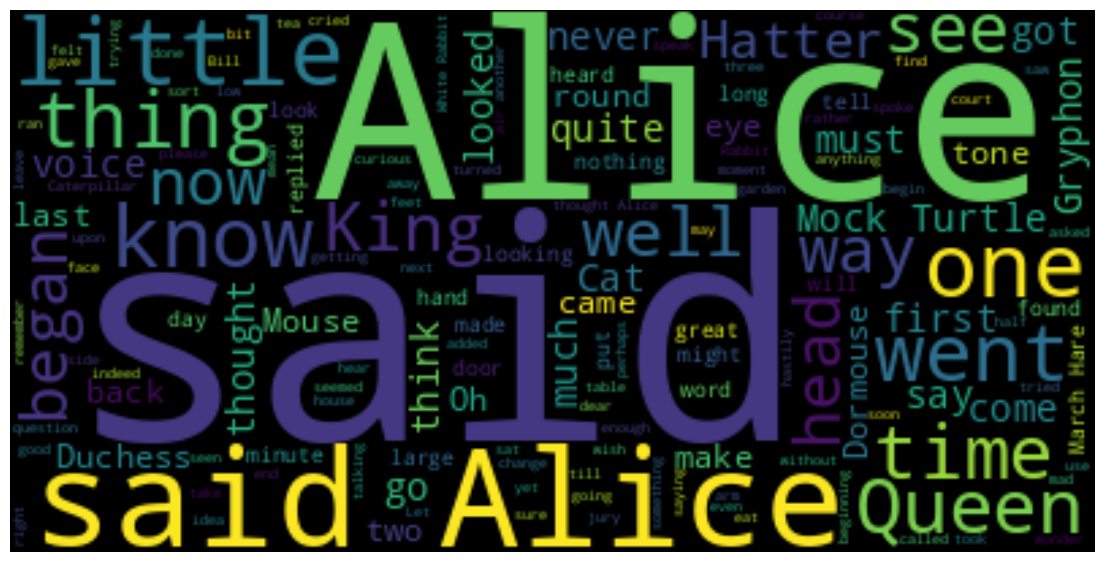

In [48]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.


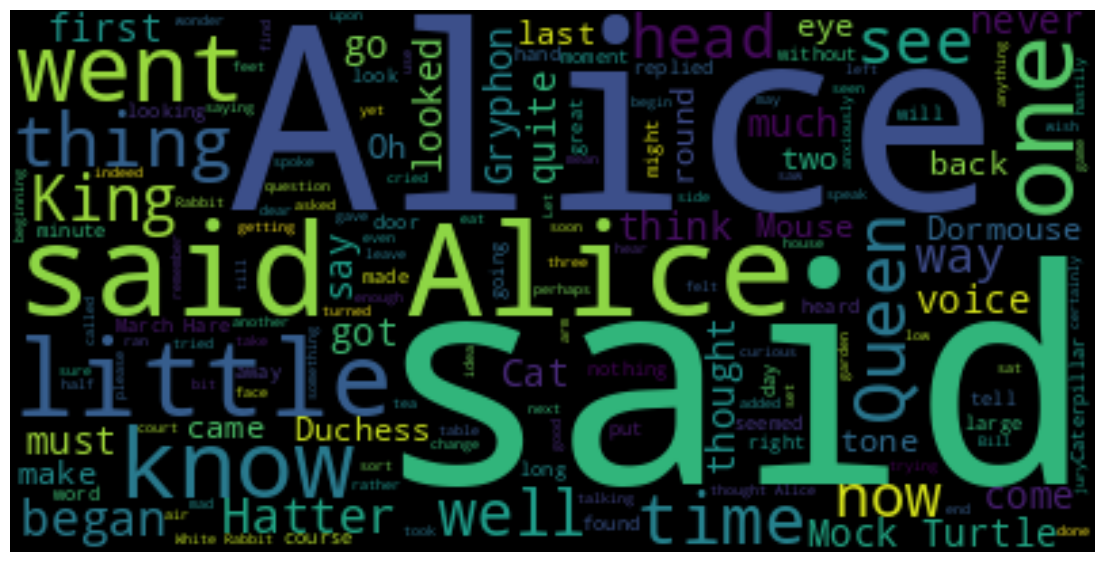

In [49]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it *alice_mask.png*.


In [50]:
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

Let's take a look at how the mask looks like.


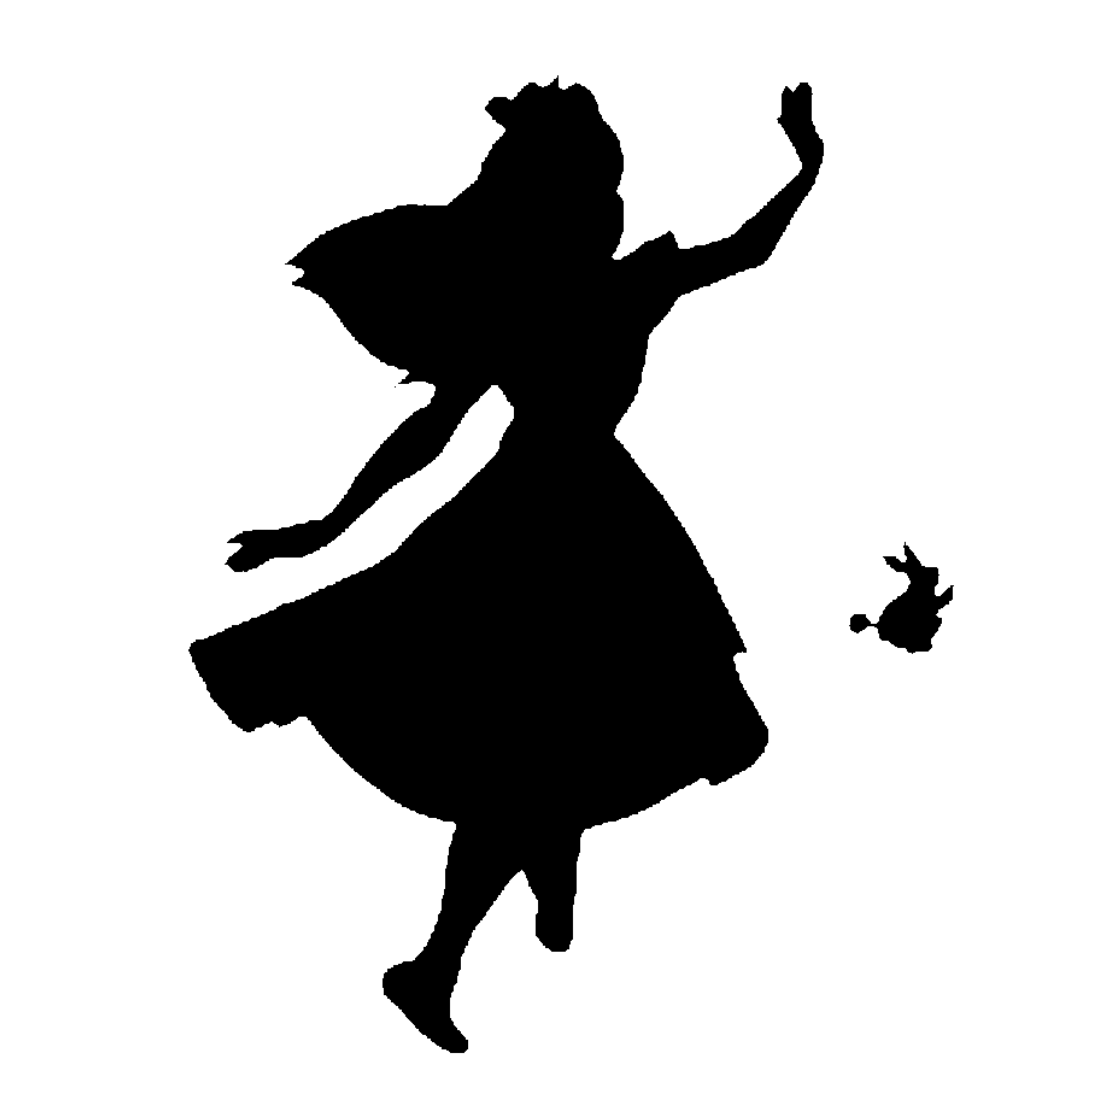

In [51]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.


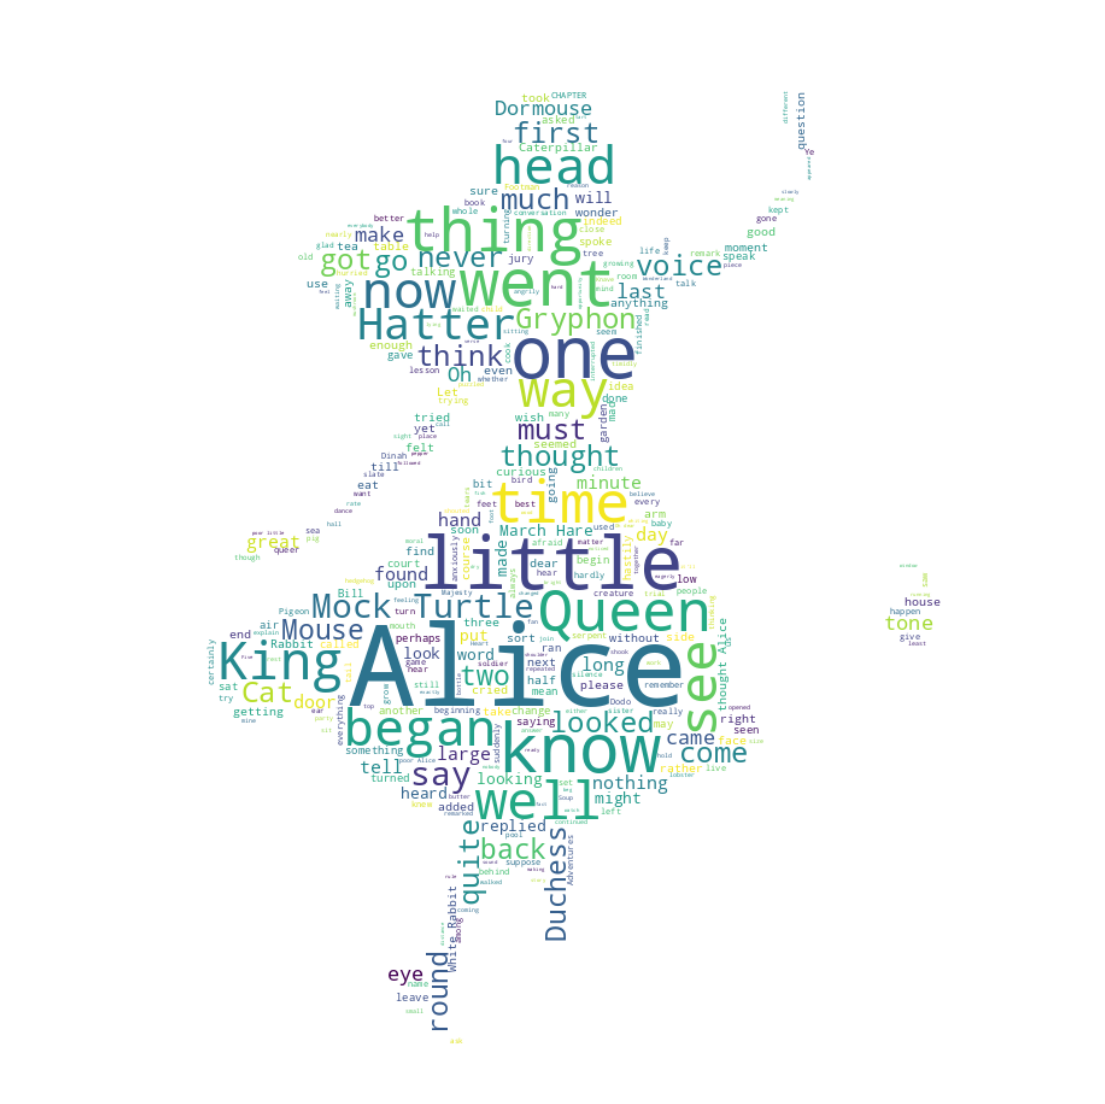

In [52]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Really impressive!


Unfortunately, our immigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.


Let's recall how our data looks like.


In [53]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


And what was the total immigration from 1980 to 2013?


In [54]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.


In [55]:
max_words = 90
word_string = ''
for country in df_can.index.values:
     # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.


In [56]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


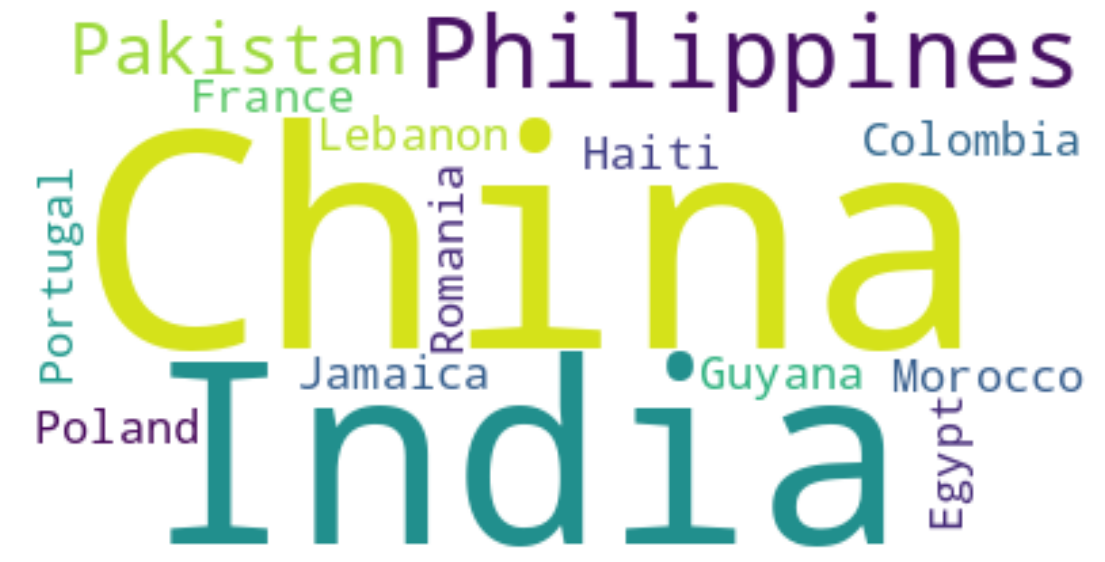

In [57]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!


# Example: a job profile

Let's create a wordcloud for a job profile to identify the most relevant words

Sample text:

Principal Offshore Geotechnical Engineer
A Principal Offshore Geotechnical Engineer in the field of wind energy is tasked with supervising and coordinating geotechnical studies for offshore wind farm projects, ensuring the stability and safety of offshore structures.

Main missions
The Principal Offshore Geotechnical Engineer is responsible for leading the geotechnical studies necessary for the design and construction of offshore wind turbine foundations. He oversees geotechnical investigations such as surveys, soil sampling, and laboratory analyses to assess soil bearing capacity and marine geological conditions.

He/She closely collaborates with engineering and construction teams to define technical specifications for foundations and recommends the most suitable geotechnical solutions based on site characteristics, environmental constraints, and safety standards.

He/She oversees geotechnical work during offshore construction, coordinating drilling operations, foundation installation, and quality control to ensure compliance with project specifications and regulations.

Job activities
Supervision of offshore geotechnical studies: Lead geotechnical investigation campaigns at sea, including drilling and soil sampling, to evaluate mechanical and geological properties of the seabed.

Analysis of geotechnical data: Analyze data obtained from geotechnical studies to assess soil stability and design foundations tailored to site-specific conditions and loads imposed by offshore turbines.

Recommendation of geotechnical solutions: Propose innovative geotechnical solutions to optimize foundation design and reduce construction costs while ensuring safety and durability of installations.

Collaboration with design teams: Work closely with design engineers to integrate geotechnical constraints into foundation design and ensure compatibility with offshore wind turbines.

Coordination of construction operations: Coordinate offshore construction operations, including foundation installation and equipment setup, ensuring compliance with technical specifications and safety standards.

Monitoring of foundation performance: Monitor foundation performance during the operational phase, conducting regular inspections and analyzing surveillance data to detect signs of failure or degradation.

Management of geotechnical risks: Evaluate geotechnical risks associated with offshore wind projects and propose mitigation measures to minimize potential impacts on safety and reliability of installations.

Technological and regulatory monitoring: Stay updated on technological and regulatory developments in offshore geotechnics and integrate best practices and latest standards into ongoing projects.

Required skills
A Principal Offshore Geotechnical Engineer in the offshore wind energy sector must possess the following skills:

Proficiency in offshore geotechnical investigation techniques

In-depth knowledge of geotechnical principles and soil mechanics

Skills in geotechnical modeling and data analysis

Ability to work in teams and collaborate with various stakeholders

Sensitivity to safety and sustainability issues in offshore projects


Spurce: https://altea-energy.com/sheets/offshore-geotechnical-engineer-renewable-energies-2/

Paste your text here to generate a word cloud:
Offshore geotechnical engineer Category:  Management & Professionals 1 - Working at the VUB For almost 50 years, the Vrije Universiteit Brussel has stood for freedom, equality and connectedness. These values are strongly present on our campuses, in our students as well as our staff. At the VUB, you’ll find a diverse collection of personalities: pure innovators and especially people who are 100% their authentic selves. With about 4000 employees, we are the largest Flemish-speaking employer in Brussels, an international city with which we are all too happy to be connected, and around which our four campuses are located.  2 - Position Description OWI-lab is the research group at the Vrije Universiteit Brussels that aims to improve the future of offshore wind energy through engineering research.  As a group we are experts in collecting and processing large amounts of engineering and measurement data.  As a geotechnical engineer at OWI-lab you 

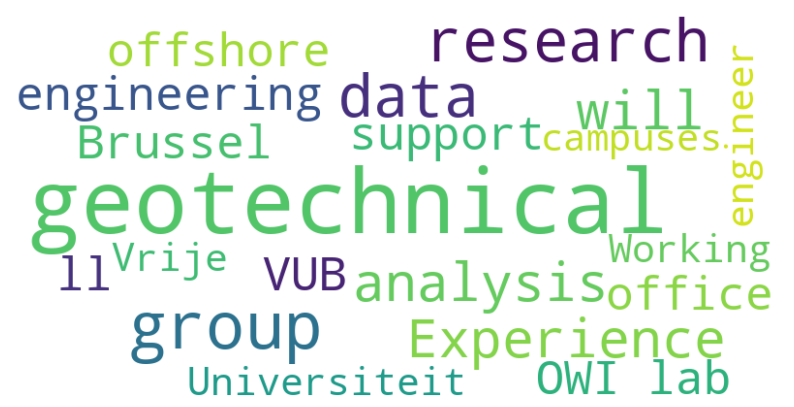

In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Prompt user to paste the text
user_text = input("Paste your text here to generate a word cloud:\n")

# Define stopwords
stopwords = set(STOPWORDS)

# Optional: Add custom stopwords
stopwords.add("example")  # Add any word you'd like to exclude

# Instantiate a WordCloud object with stopwords
wordcloud = WordCloud(
    width=800,              # Width of the canvas
    height=400,             # Height of the canvas
    max_words=20,           # Control the number of words to display
    background_color='white', # Background color
    stopwords=stopwords     # Apply stopwords
)

# Generate the word cloud from the user-provided text
wordcloud.generate(user_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axes
plt.show()



Enter the URL of the webpage:
https://jobs.vub.be/job/Elsene-Offshore-geotechnical-engineer/1153560601/


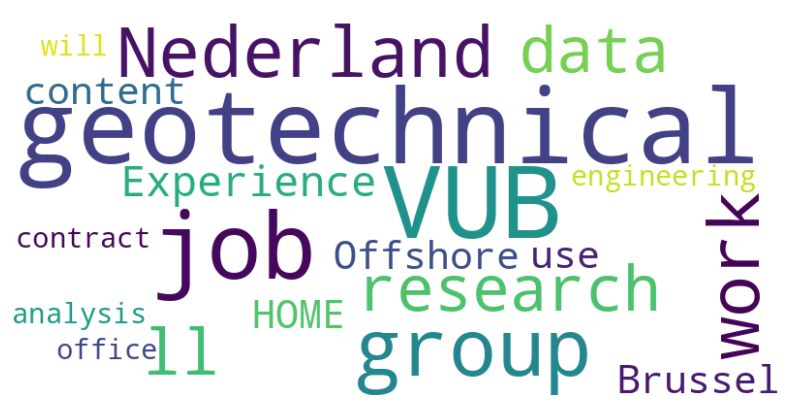

In [64]:
# this one extracts data from the whole URL
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Prompt the user for the URL
url = input("Enter the URL of the webpage:\n")

try:
    # Set headers to mimic a browser
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    # Fetch the webpage content
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an error for bad responses (4xx and 5xx)
    webpage_content = response.text

    # Parse the HTML content
    soup = BeautifulSoup(webpage_content, "html.parser")

    # Extract visible text (ignoring scripts, styles, etc.)
    text = soup.get_text(separator=" ").strip()

    # Define stopwords
    stopwords = set(STOPWORDS)

    # Optional: Add custom stopwords
    stopwords.add("example")  # Add any word you'd like to exclude

    # Instantiate a WordCloud object with stopwords
    wordcloud = WordCloud(
        width=800,              # Width of the canvas
        height=400,             # Height of the canvas
        max_words=20,           # Control the number of words to display
        background_color='white', # Background color
        stopwords=stopwords     # Apply stopwords
    )

    # Generate the word cloud from the extracted text
    wordcloud.generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axes
    plt.show()

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except Exception as e:
    print(f"Error fetching or processing the webpage: {e}")


# Plotting with Seaborn <a id="5"></a>

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


In lab *Pie Charts, Box Plots, Scatter Plots, and Bubble Plots*, we learned how to create a scatter plot and then fit a regression line. It took \~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore *seaborn* and see how efficient it is to create regression lines and fits using this library!


### Categorical Plots
In our data 'df_can', let's find out how many continents are mentioned


In [66]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

### countplot
**A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.**
Let's find the count of Continents in the data 'df_can' using countplot on 'Continent'


<Axes: xlabel='Continent', ylabel='count'>

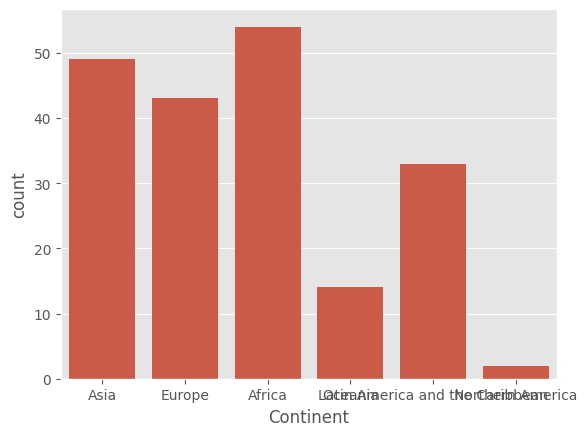

In [67]:
sns.countplot(x='Continent', data=df_can)

The labels on the x-axis doesnot look as expected.<br>Let's try to replace the 'Latin America and the Caribbean' with and "L-America", 'Northern America' with "N-America", <br>and change the figure size and then display the plot again


In [68]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

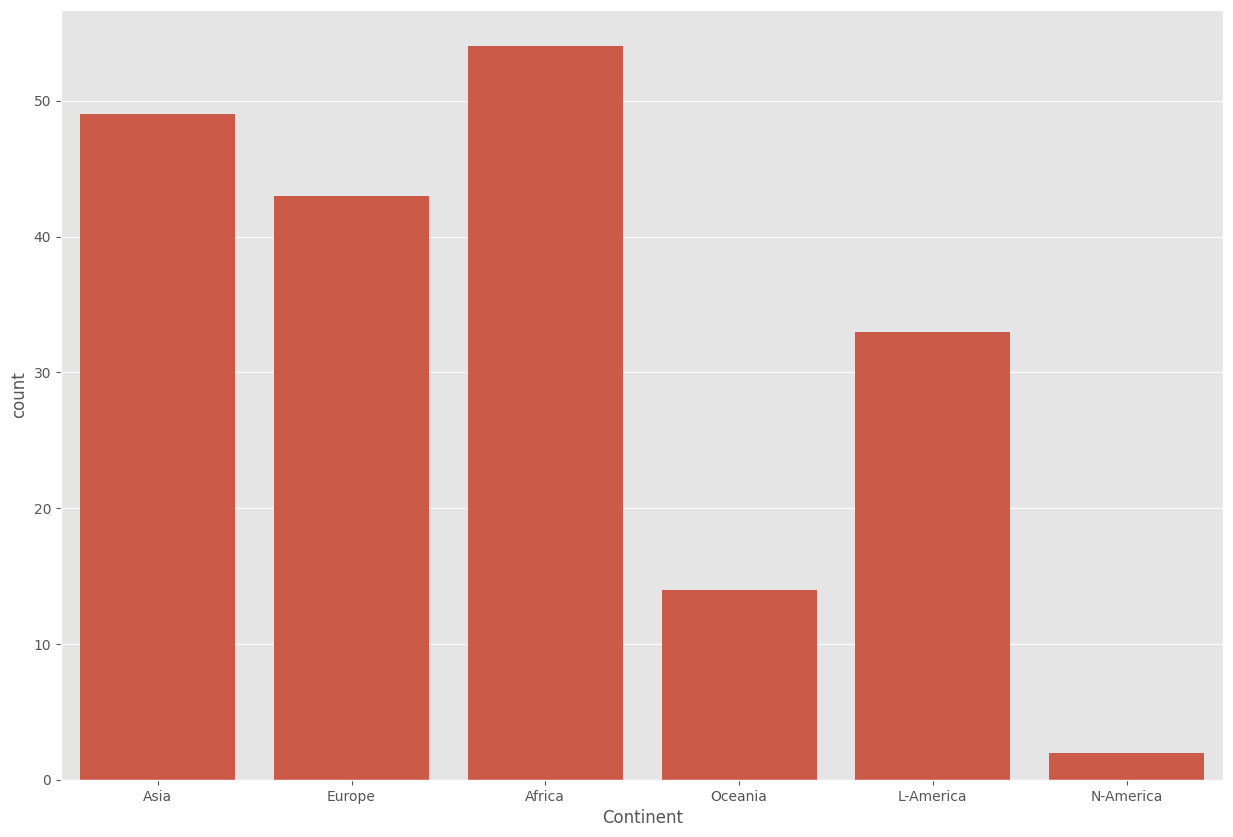

In [69]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df_can1)

Much better!


<Axes: xlabel='Continent', ylabel='Count'>

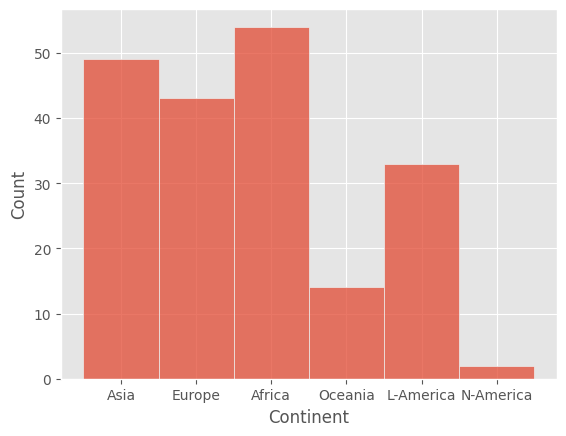

In [73]:
# We can also use directly histplot
sns.histplot(x='Continent', data=df_can1)

### Barplot
**This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals**.<br> Let's plot the total immigrants Continent-wise


<Axes: xlabel='Continent', ylabel='Total'>

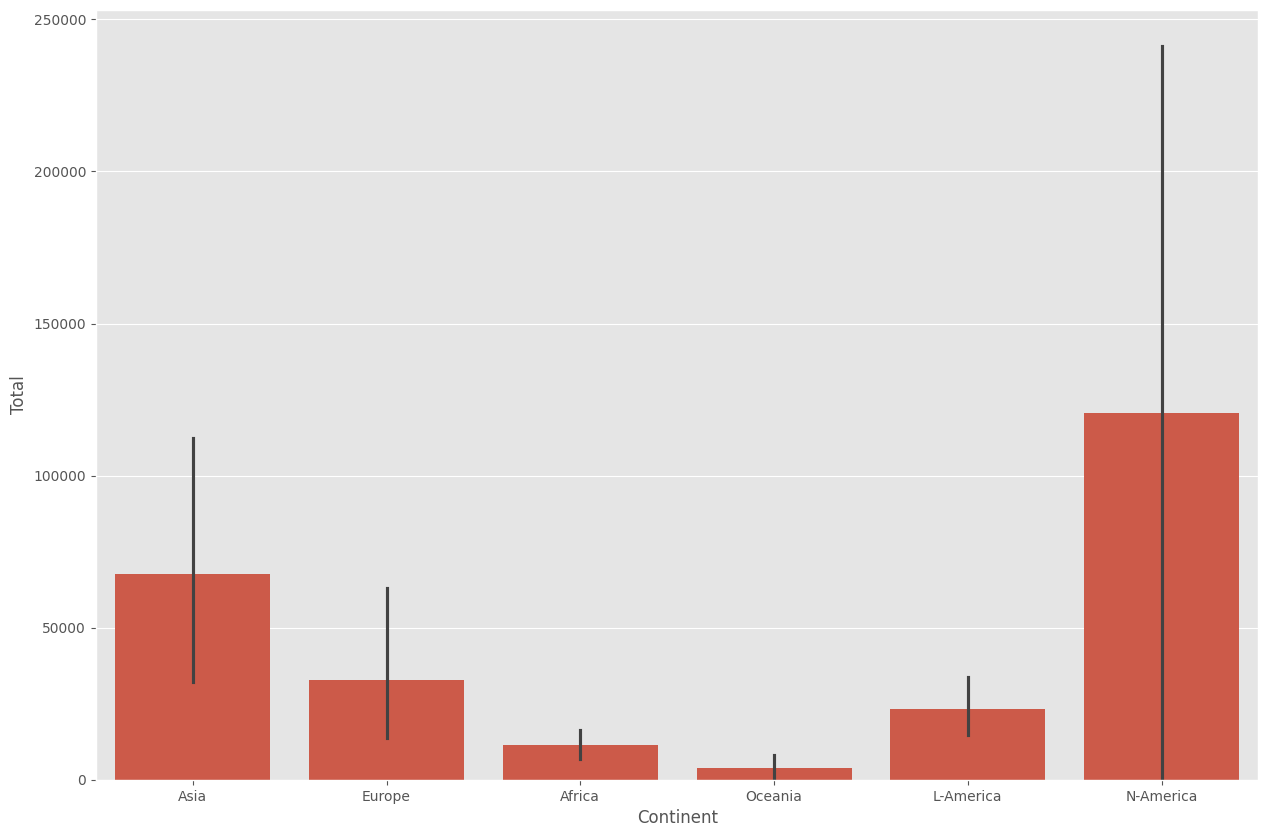

In [74]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can1)

You can verify the values by performing the groupby on the Total and Continent for mean()


In [75]:
df_Can2=df_can1.groupby('Continent')['Total'].mean()
df_Can2

,Total
Continent,
Africa,11462.000000
Asia,67710.081633
Europe,32812.720930
L-America,23186.303030
N-America,120571.000000
Oceania,3941.000000


Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.


In [97]:
# Sum data across the specified columns (1980 to 1990)
df_can3 = df_can.loc[:, '1980':'1990'].sum(axis=0)

# Reset the index to turn the year into a column
df_can3 = df_can3.reset_index()

# Rename the columns for better clarity
df_can3.rename(columns={'index': 'Year', 0: 'Total'}, inplace=True)

# Convert the 'Year' column to int
df_can3['Year'] = df_can3['Year'].astype(int)

# Display the first few rows of the resulting DataFrame
df_can3.head()


,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [99]:
df_can3['Year'].dtype

dtype('int64')

<Axes: xlabel='Year', ylabel='Total'>

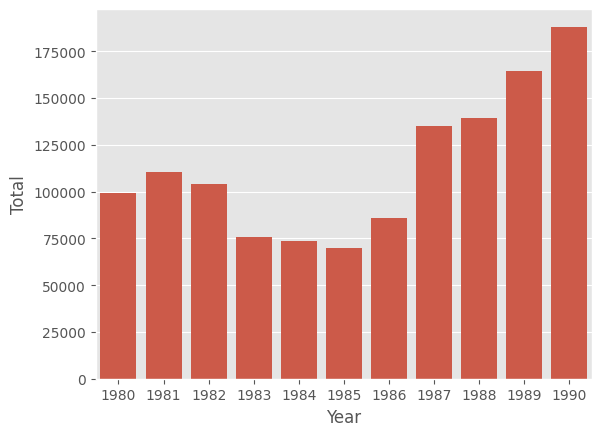

In [96]:
sns.barplot(x='Year', y='Total', data=df_can3)

# Regression Plot <a id="6"></a>
With *seaborn*, generating a regression plot is as simple as calling the **regplot** function.


In [100]:
years = list(map(str, range(1980, 2014)))
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

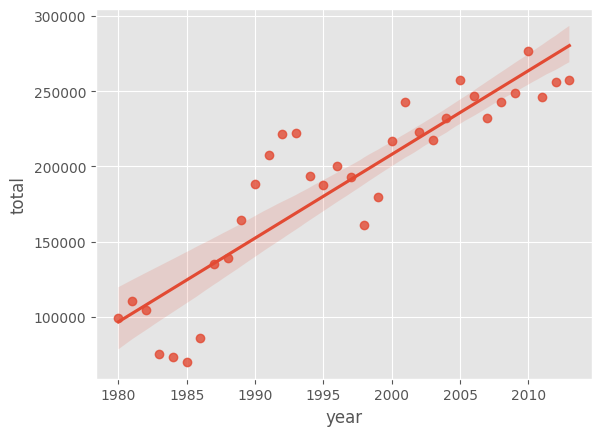

In [101]:
#seaborn is already imported at the start of this lab
sns.regplot(x='year', y='total', data=df_tot)

This is not magic; it is *seaborn*! You can also customize the color of the scatter plot and regression line. Let's change the color to green.


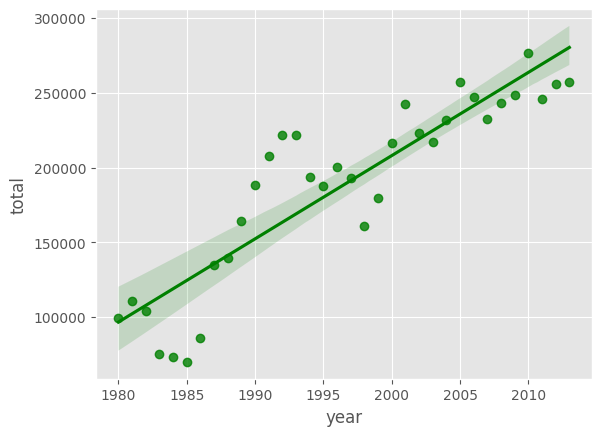

In [102]:
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

You can always customize the marker shape, so instead of circular markers, let's use `+`.


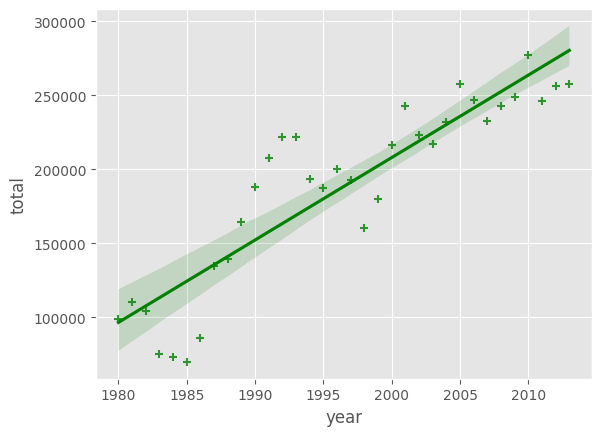

In [103]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

Let's blow up the plot a little so that it is more appealing to the sight.


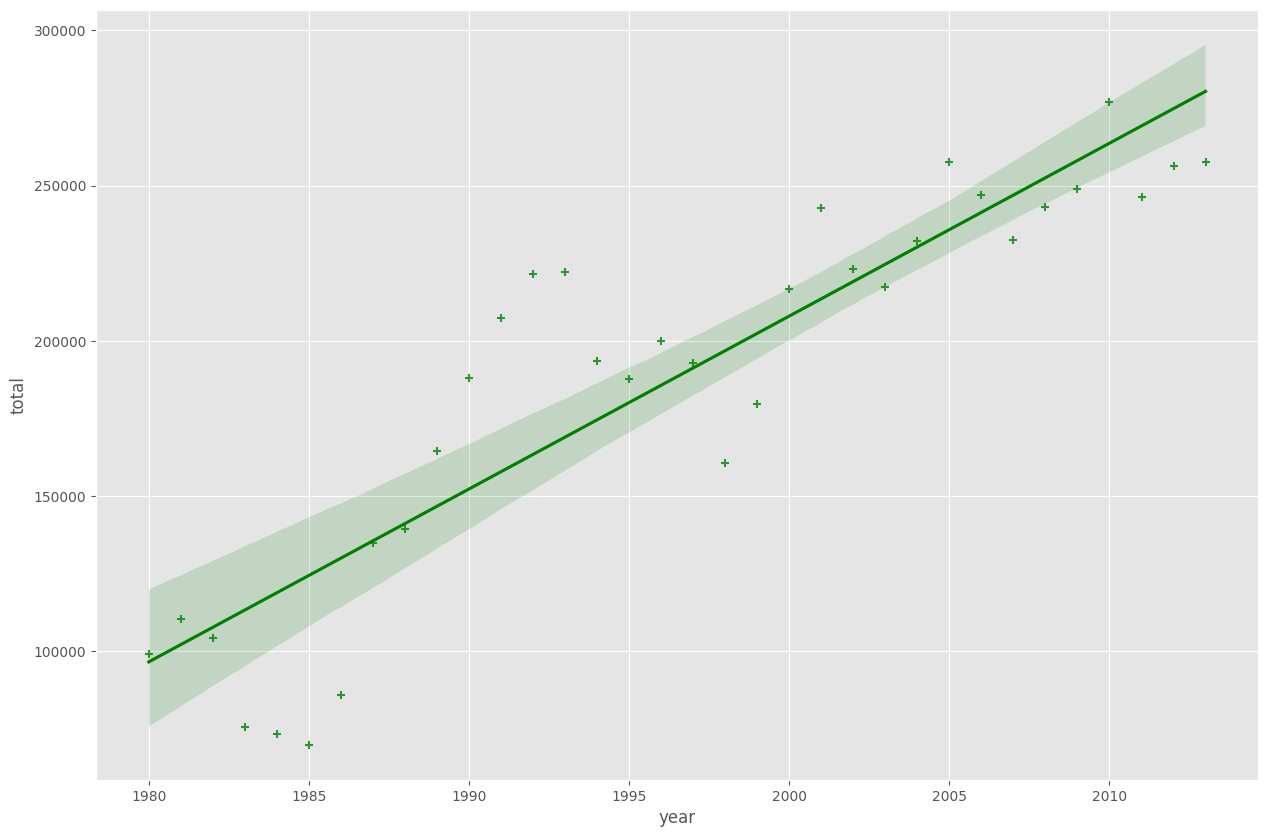

In [104]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.


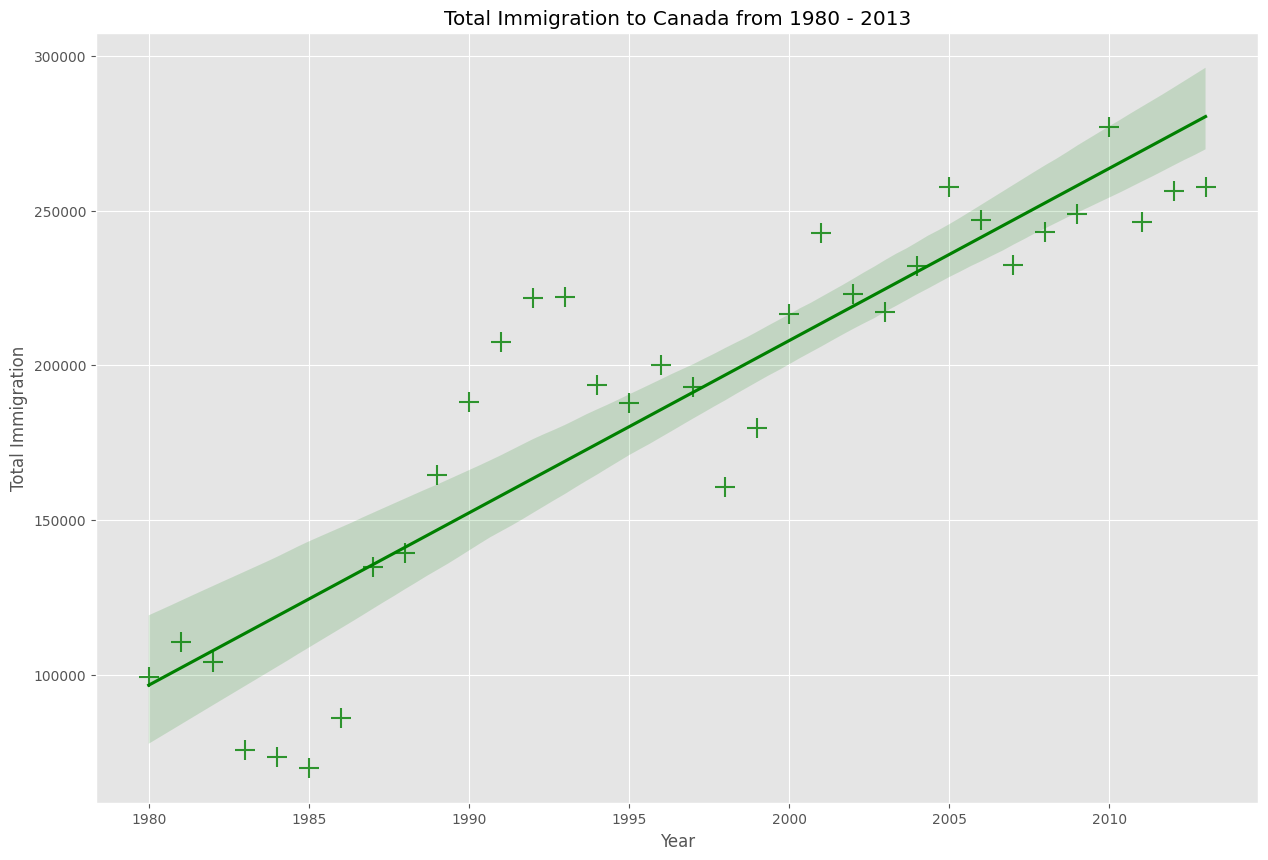

In [105]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

And finally increase the font size of the tickmark labels, the title, and the x- and y-labels so they don't feel left out!


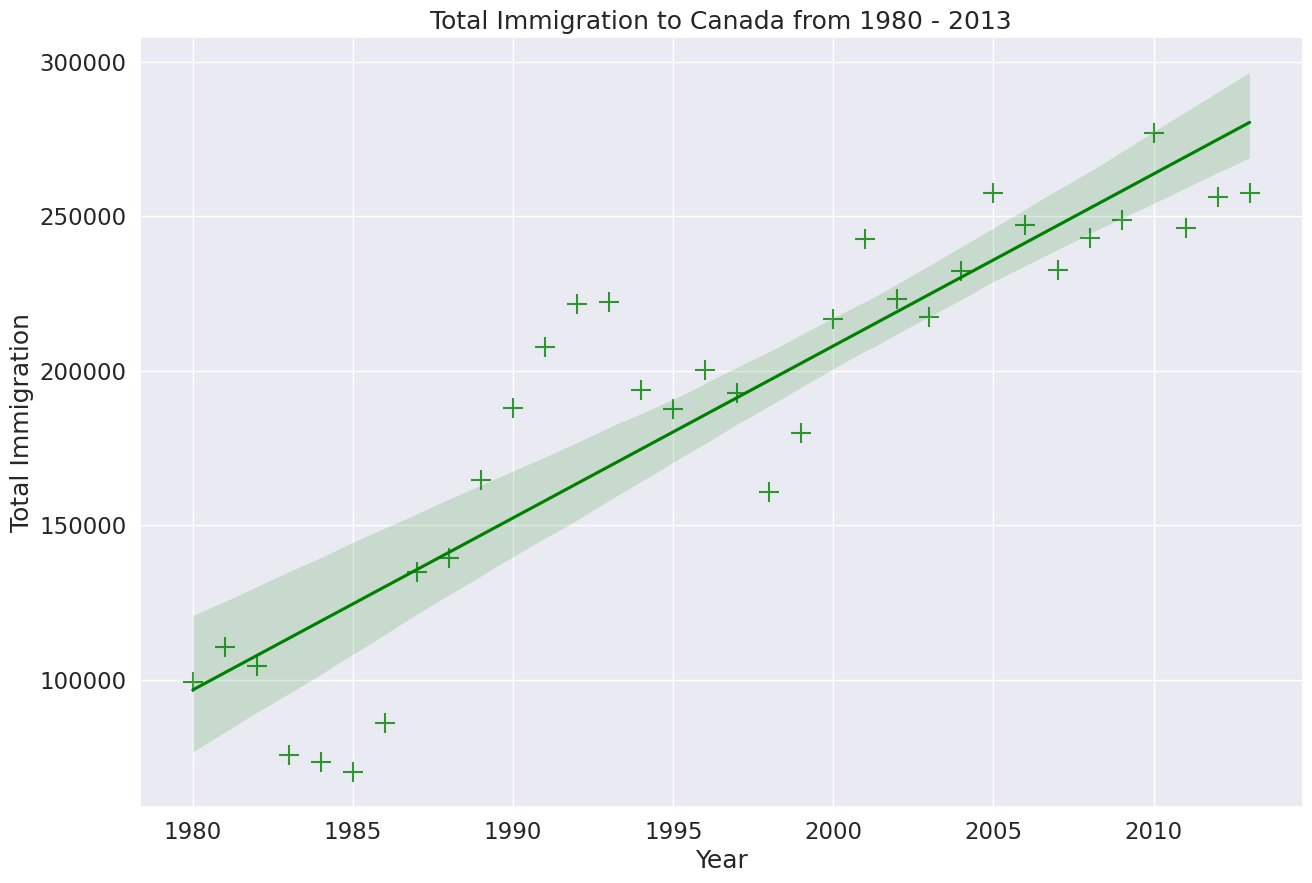

In [106]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Amazing! A complete scatter plot with a regression fit with 5 lines of code only. Isn't this really amazing?


If you are not a big fan of the purple background, you can easily change the style to a white plain background.


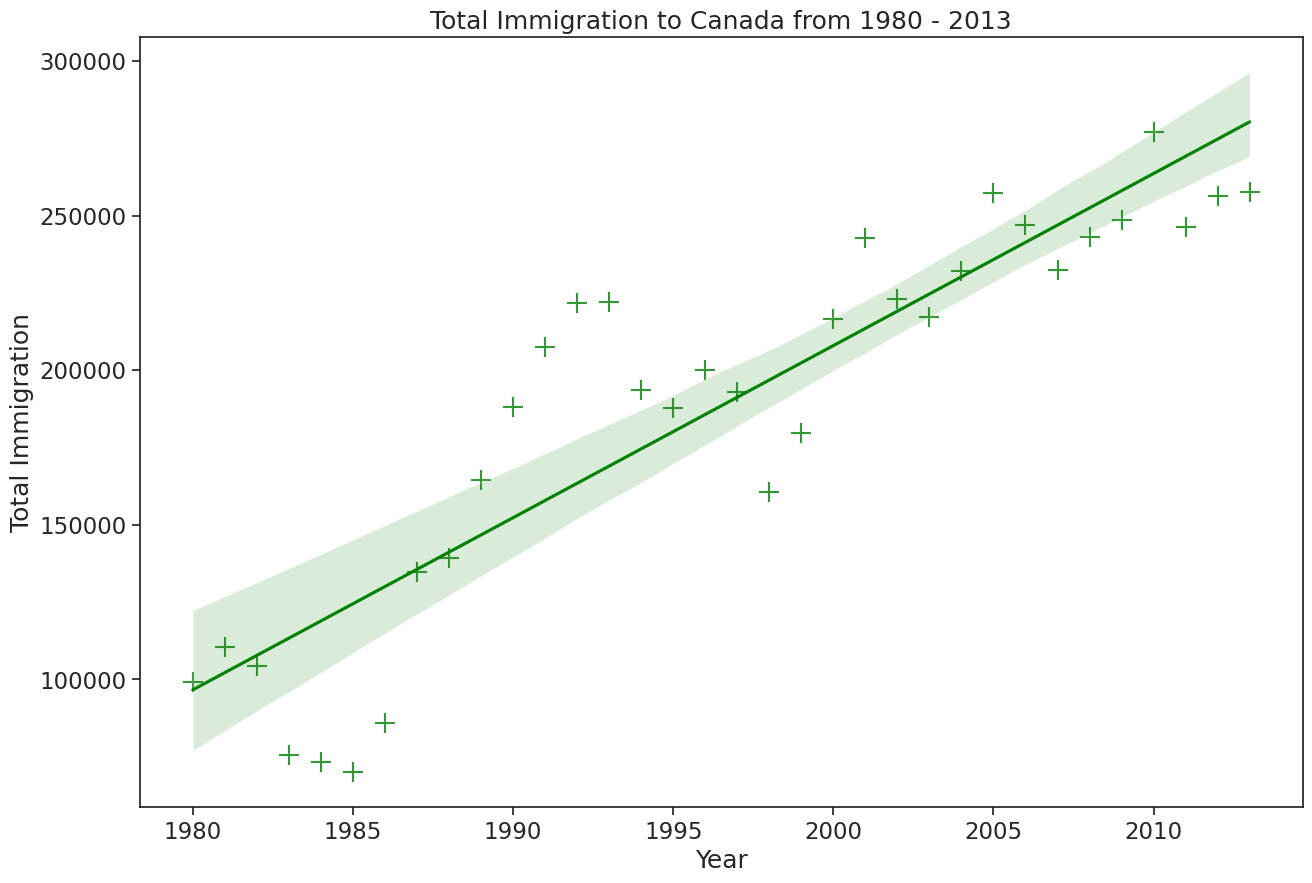

In [107]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Or to a white background with gridlines.


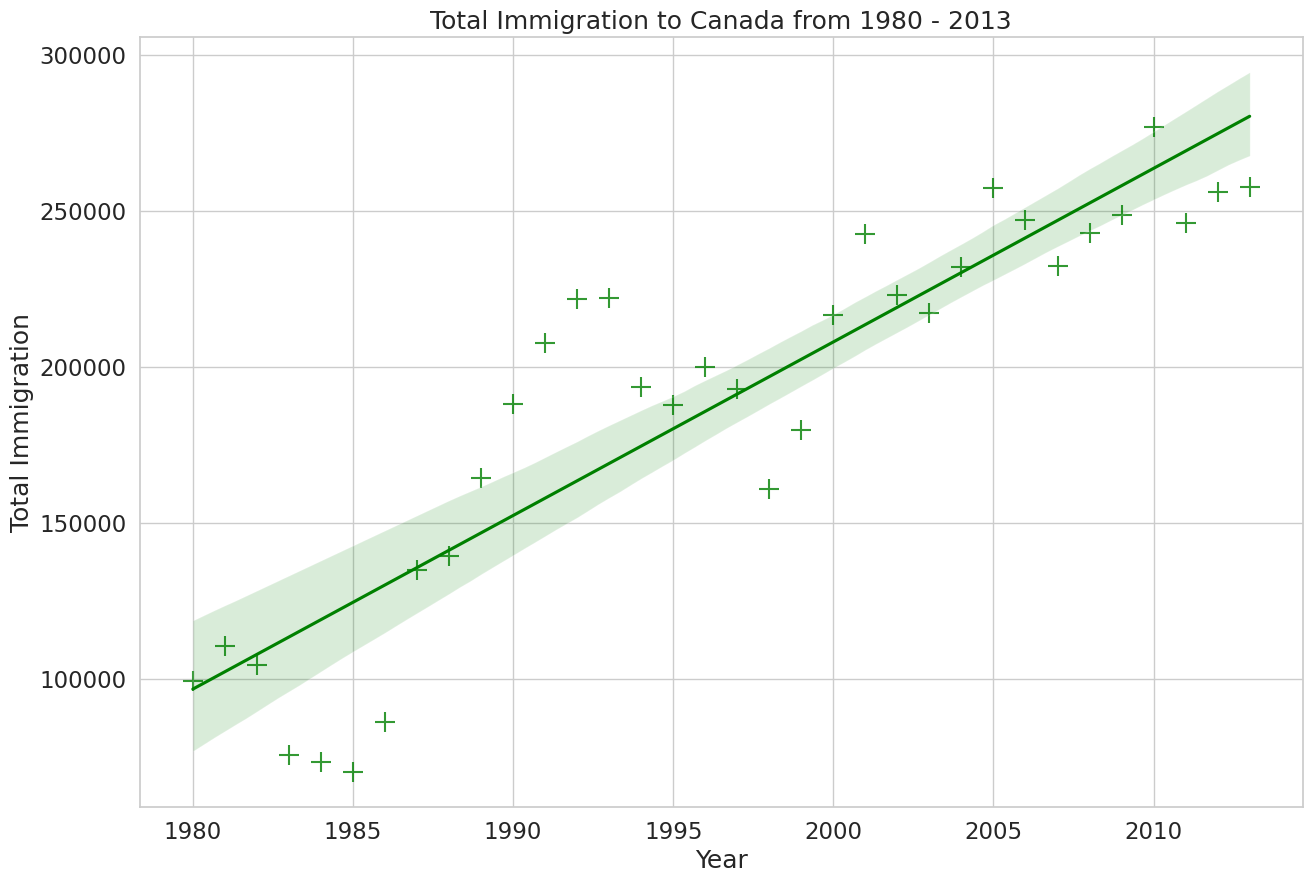

In [108]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.


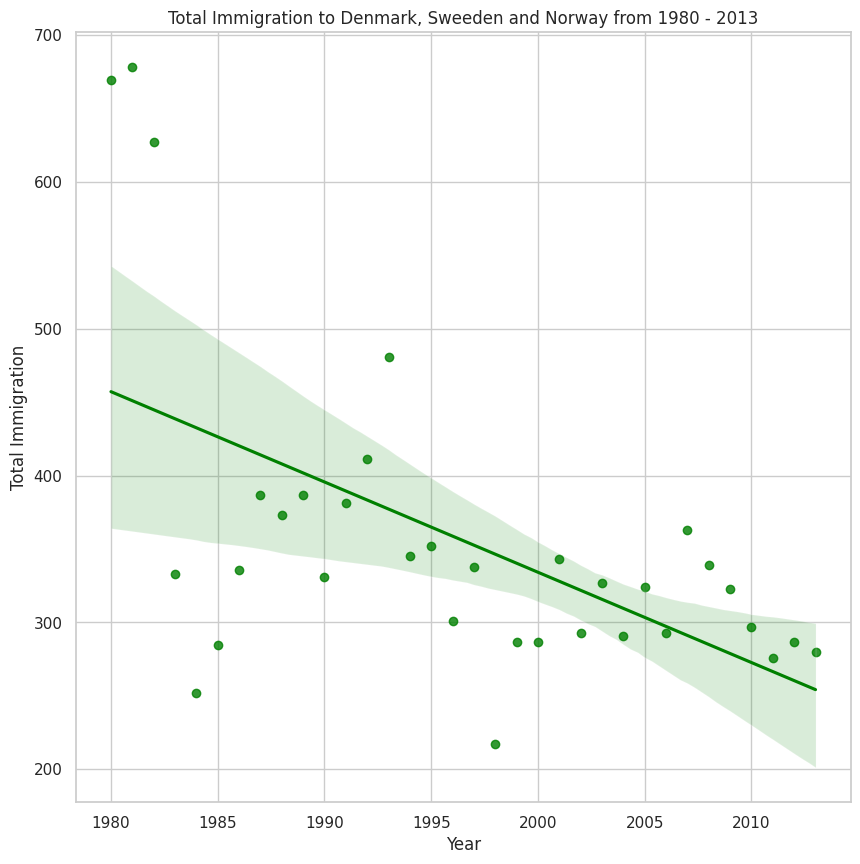

In [129]:
# Create a list of years as strings
years = list(map(str, range(1980, 2014)))

# Select the rows for 'Denmark', 'Sweden', and 'Norway' and columns for the years
df_dsn = df_can.loc[['Denmark', 'Sweden', 'Norway'], years].transpose()

# Sum across the rows (axis=1) to get the total for each year
df_dsn_total = df_dsn.sum(axis=1)

# Reset the index to convert the row names into a column
df_dsn_total = df_dsn_total.reset_index()

# Rename columns for clarity
df_dsn_total.rename(columns={'index': 'Year', 0: 'Total'}, inplace=True)

# as years data type is str, we need to transform it into int or float
df_dsn_total['Year'] = df_dsn_total['Year'].astype(float)
# Display the first few rows of the resulting DataFrame
#df_dsn_total.head()


plt.figure(figsize=(10, 10))

sns.set(font_scale=1.0)
sns.set_style('whitegrid')

ax = sns.regplot(x='Year',y='Total', data=df_dsn_total,color='green',marker='o')
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Denmark, Sweeden and Norway from 1980 - 2013')
plt.show()






<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    # create df_countries dataframe
    df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # define figure size
    plt.figure(figsize=(15, 10))

    # define background style and font size
    sns.set(font_scale=1.5)
    sns.set_style('whitegrid')

    # generate plot and add title and axes labels
    ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
    ax.set(xlabel='Year', ylabel='Total Immigration')
    ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

```

</details>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">Alex Aklson</a><br>
<a href ="https://www.linkedin.com/in/p-b28802262/">Dr. Pooja</a>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
<!--

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2023-07-07        | 2.7     | Dr. Pooja         | wordcloud, sns, piplite,pywaffle issue resolved       |
| 2023-06-11        | 2.6     | Dr. Pooja         | Clean data link, pywaffle,Categorical plots included       |
| 2021-05-19        | 2.3     | Weiqing Wang  | Fixed typos and code spells        |
| 2021-01-21        | 2.2     | Lakshmi Holla | Updated TOC markdown cell          |
| 2020-11-03        | 2.1     | Lakshmi Holla | Changed URL of excel file          |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab | --!>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
